In [117]:
import numpy as np
import matplotlib.pyplot as plt
import amstrax
import strax
%matplotlib inline

In [118]:
def print_entry(d, n=0, skip_lists=False):
    ''' Print one entry
    '''
    el = d[n]
    for key in d.dtype.names:
        if (type(el[key]) == list or type(el[key]) == np.ndarray) and skip_lists:
            continue
        else:
            print("{:<15} : ".format(key), el[key])
    return

In [119]:
run_id = '190213_125426'

In [120]:
# !rm -rf ./strax_data/190124_114450-*
!rm -rf ./strax_data/190213_125426-*

In [121]:
st = strax.Context(storage=strax.DataDirectory('./strax_data'),
                   register = [amstrax.RecordsFromMongo, amstrax.Records, amstrax.Peaks],
                   config=dict(collection_name = run_id, events_per_chunk = 1, hitfinder_threshold = 100, min_hits=2
                              ))

# st = strax.Context(storage=strax.DataDirectory('./strax_data'),
#                    register = [amstrax.RecordsFromMongo, amstrax.Records, amstrax.Peaks],
#                    config=dict(collection_name = run_id, events_per_chunk = 1000, 
#                                software_zle_hitfinder_threshold=6, software_zle_channels = [0, 1,2,3,4,5,6,7],
#                                software_zle_extension = 20, hitfinder_threshold = 10, min_hits=1
#                               ))

In [122]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 813 ms, sys: 75.9 ms, total: 889 ms
Wall time: 727 ms


In [123]:
%%time
st.make(run_id,'records')

CPU times: user 924 ms, sys: 105 ms, total: 1.03 s
Wall time: 874 ms


In [124]:
%%time
st.make(run_id,'peaks')

CPU times: user 1.04 s, sys: 795 ms, total: 1.83 s
Wall time: 1.7 s


In [125]:
peak = st.get_array(run_id, 'peaks')

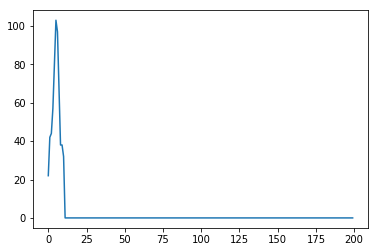

In [126]:
plt.plot(peak[59]['data'])
plt.show()

In [10]:
%%time
st.make(run_id, 'records')

Exception in thread load:raw_records:
Traceback (most recent call last):
  File "/home/xams/anaconda3/envs/strax/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/xams/anaconda3/envs/strax/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/xams/strax/strax/mailbox.py", line 169, in _send_from
    for x in iterable:
  File "/home/xams/strax/strax/storage/common.py", line 337, in loader
    raise DataCorrupted(f"No chunks of data in {backend_key}")
strax.storage.common.DataCorrupted: No chunks of data in ./strax_data/190213_125426-raw_records-cdbeee44321224d5972a6b9026755f28f1f822f6



DataCorrupted: No chunks of data in ./strax_data/190213_125426-raw_records-cdbeee44321224d5972a6b9026755f28f1f822f6

In [26]:
st.show_config('peaks')

,option,default,current,applies_to,help
0,min_hits,1,1,peaks,Minimum number of hits to make a peak
1,diagnose_sorting,False,<OMITTED>,peaks,Enable runtime checks for sorting and disjoint...
2,hitfinder_threshold,10,10,peaks,Threshold in ADC counts
3,left_extension,20,<OMITTED>,peaks,Extend peaks by this many ns left
4,right_extension,150,<OMITTED>,peaks,Extend peaks by this many ns right
5,gap_threshold,300,<OMITTED>,peaks,No hits for this much ns means new peak
6,software_zle_channels,[],"[0, 1, 2, 3, 4, 5, 6, 7]",records,Channels to apply software ZLE to
7,software_zle_hitfinder_threshold,15,6,records,Min ADC count threshold used if ZLE is applied
8,software_zle_extension,50,20,records,Number of samples to save around a hit
9,collection_name,,190124_114450,raw_records,"Collection used, example: '190124_110558'"


In [27]:
%%time
st.make(run_id, 'peaks', config=dict(left_extension = 50))

CPU times: user 15.1 s, sys: 8.33 s, total: 23.5 s
Wall time: 8.16 s


In [28]:
peaks = st.get_array(run_id, 'peaks', config=dict(left_extension = 50))

In [59]:
plt.plot(peaks[4]['data'])

NameError: name 'peaks' is not defined

In [31]:
st.data_info('peaks')

,Field name,Data type,Comment
0,channel,int16,Channel/PMT number
1,dt,int16,Time resolution in ns
2,time,int64,Start time of the interval (ns since unix epoch)
3,length,int32,Length of the interval in samples
4,area,float32,Integral across channels in photoelectrons
5,area_per_channel,"('<i4', (16,))",Integral per channel in ADX x samples (not PE!)
6,n_hits,int16,Number of hits from which peak was constructed...
7,data,"('<f4', (200,))",Waveform data in PE/sample (not PE/ns!)
8,width,"('<f4', (11,))",Peak widths in ns: range of central area fraction
9,saturated_channel,"('<i2', (16,))",Check if channel is saturated


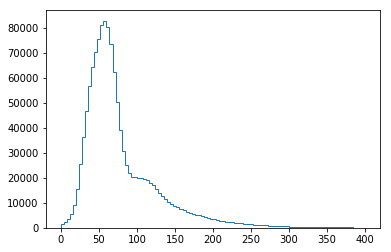

In [30]:
plt.hist(peaks['area'], bins=100, histtype='step', range=(0, 400))
plt.show()

array([     5086,      5946,      6826, ..., 775221562, 775222202,
       775223102])

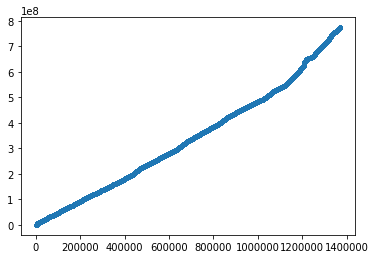

In [16]:
plt.plot(r['time'], marker='.')

In [18]:
r[0]

(8, 10, 5086, 82, 61, 82, 0, -8359.1, 0, [ 0,  1,  0,  2,  2,  2,  3,  1,  0, -2, -1,  0, -1,  0,  2,  1, -1,  2,  1, -2, -1, -2, -2, -1,  0, -2, -2,  2,  0,  0, -1,  1, -2,  0, -1,  2,  2,  2,  0, -1, 11, 13,  9,  8,  4,  2,  3,  1,  2,  1,  0,  1, -1,  1,  1,  1, -1, -1,  0,  2,  3, -2,  0, -2, -1, -2,  3,  2,  1,  1,  0, -2, -2, -1,  1,  0,  2, -1,  0,  2, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [6]:
st.make(run_id, 'records', config=dict(software_zle_channels = [8], extension=20))

[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  True  True ...  True  True  True]
20
[ True  Tr

In [7]:
bla = st.get_array(run_id, 'records')

In [8]:
bla

array([(8, 10,      5086,  82,  61,  82, 0, -8359.1  , 0, [ 0,  1,  0,  2,  2,  2,  3,  1,  0, -2, -1,  0, -1,  0,  2,  1, -1,  2,  1, -2, -1, -2, -2, -1,  0, -2, -2,  2,  0,  0, -1,  1, -2,  0, -1,  2,  2,  2,  0, -1, 11, 13,  9,  8,  4,  2,  3,  1,  2,  1,  0,  1, -1,  1,  1,  1, -1, -1,  0,  2,  3, -2,  0, -2, -1, -2,  3,  2,  1,  1,  0, -2, -2, -1,  1,  0,  2, -1,  0,  2, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
       (8, 10,      5946,  84, 113,  84, 0, -8358.575, 0, [ 1,  0, -1,  0,  0,  0,  0,  2, -1,  2,  3,  1, -2, -1,  0,  2,  0, -1,  0,  0, -2,  2,  2,  0, -3,  0,  0,  2,  1,  4,  2,  0,  2,  3,  1,  1,  1, -1,  0,  3,  6, 17, 14, 11,  2,  3,  1,  3,  2,  3,  3,  0,  2,  3,  3,  0,  1,  2,  0,  1,  2,  0,  0,  1,  0,  0, -1,  3,  3,  2,  0, -1,  1, -1, -1,  0,  1,  0,  2,  1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [10]:
@export
@strax.takes_config(
    strax.Option('software_zle_channels', default = [], help= 'Channels to apply software ZLE to'),
    strax.Option('hitfinder_threshold', default = 15, help= 'Min ADC count threshold used if ZLE is applied'),
    strax.Option('extension', default=50, help='Number of samples to save around a hit')
)

                          
class Records(strax.Plugin):
    __version__ = '0.0.3'
    depends_on = ('raw_records',)
    data_kind = 'records'   # TODO: indicate cuts have been done?
    compressor = 'zstd'
    parallel = True
    rechunk_on_save = False
    dtype = strax.record_dtype()

    def compute(self, raw_records):
        r = raw_records[raw_records['channel'] in self.config['software_zle_channels']]
        if len(r) :
            hits = strax.find_hits(r)
            r = strax.cut_outside_hits(r, hits, left_extension=self.config['extension'],
                                                right_extension=self.config['extension'])
        raw_records[raw_records['channel'] in self.config['software_zle_channels']] = r
        return raw_records

NameError: name 'export' is not defined

In [5]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 17.1 s, sys: 734 ms, total: 17.9 s
Wall time: 16.7 s


In [6]:
recs = st.get_array(run_id, 'raw_records')

In [7]:
recs

array([(8, 10,      5086,  82,  -61,  82, 0, 8359.1  , 0, [  0,  -1,   0,  -2,  -2,  -2,  -3,  -1,   0,   2,   1,   0,   1,   0,  -2,  -1,   1,  -2,  -1,   2,   1,   2,   2,   1,   0,   2,   2,  -2,   0,   0,   1,  -1,   2,   0,   1,  -2,  -2,  -2,   0,   1, -11, -13,  -9,  -8,  -4,  -2,  -3,  -1,  -2,  -1,   0,  -1,   1,  -1,  -1,  -1,   1,   1,   0,  -2,  -3,   2,   0,   2,   1,   2,  -3,  -2,  -1,  -1,   0,   2,   2,   1,  -1,   0,  -2,   1,   0,  -2,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
       (8, 10,      5946,  84, -113,  84, 0, 8358.575, 0, [ -1,   0,   1,   0,   0,   0,   0,  -2,   1,  -2,  -3,  -1,   2,   1,   0,  -2,   0,   1,   0,   0,   2,  -2,  -2,   0,   3,   0,   0,  -2,  -1,  -4,  -2,   0,  -2,  -3,  -1,  -1,  -1,   1,   0,  -3,  -6, -17, -14, -11,  -2,  -3,  -1,  -3,  -2,  -3,  -3,   0,  -2,  -3,  -3,   0,  -1,  -2,   0,  -1,  -2,   0,   0,  -1,   0,   0, 

In [ ]:
# passing only pulse location lists

In [7]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 19.2 s, sys: 1.75 s, total: 21 s
Wall time: 19.7 s


In [5]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 19.1 s, sys: 1.83 s, total: 20.9 s
Wall time: 20.2 s


In [5]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 24.6 s, sys: 1.83 s, total: 26.5 s
Wall time: 25.2 s


In [8]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 20.9 s, sys: 1.37 s, total: 22.2 s
Wall time: 21.2 s


In [ ]:
# Only decoding control words

In [5]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 16.6 s, sys: 1.19 s, total: 17.7 s
Wall time: 16.9 s


In [ ]:
# No JIT

In [7]:
%%time
st.make(run_id, 'raw_records')

CPU times: user 33.8 s, sys: 1.39 s, total: 35.1 s
Wall time: 34.1 s


In [ ]:
raw_records = st.get_array(run_id, 'raw_records')

In [ ]:
raw_records['baseline']

In [6]:
peaks = st.get_array(run_id, 'peaks', config=dict(min_hits=1) )

In [ ]:
plt.hist(peaks['area'],bins=50,log=True)

In [ ]:
peaks = st.get_array(run_id, 'peaks', config=dict(min_hits=1))

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def plot_peaks(main_i, n_before=0, n_after=0, label_threshold=0):
    for i in main_i + np.arange(-n_before, n_after + 1):
        p = peaks[i]
        label = None
        if p['area'] > label_threshold:
            label = '%.1f PE, %d ns dt' % (p['area'], p['dt'], )
        plot_peak(p,
                  t0=peaks[main_i]['time'],
                  label=label)
    plt.ylim(0, None)
    plt.legend(loc='upper right')
    #plt.yscale('symlog')

def plot_peak(p, t0=None, **kwargs):
    n = p['length']
    if t0 is None:
        t0 = p['time']
    plt.plot((p['time'] - t0) + np.arange(n) * p['dt'],
             p['data'][:n] / p['dt'],
             linestyle='steps-mid',
             **kwargs)
    plt.xlabel("Time (ns)")
    plt.ylabel("Sum waveform (PE / ns)")


In [ ]:
plot_peak(peaks[0])

In [ ]:
peaks

In [ ]:
amstrax.Peaks?